In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
train_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_train_task2.csv",encoding='utf8')
test_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_test_task2.csv",encoding='utf8')
train_set = train_set.drop(columns=['id', 'Unnamed: 0'])
test_set = test_set.drop(columns=['id', 'Unnamed: 0'])

In [4]:
train_set

,joke,label
0,请告诉我，史密斯先生，面试官问道，您还有什么其他您认为值得一提的技能吗？ 的确还有，应聘者谦...,1
1,一辆小汽车急速闯过红灯，刚好被警察拦住。 喂，你难道没有看见红灯吗？ 不，真对不起，我看到红...,1
2,教官子与县丞子厮打，教官子屡负，归而哭诉其母。母 曰：彼家终日吃肉，故恁般强健会打。你家终日...,0
3,经验是我们秃顶后大自然赋予我们的梳子。,1
4,正在进行中 - 它可能很慢，但它很稳定。请耐心等待。谢谢。,1
...,...,...
8995,一官员因贪污受贿被判刑，儿子探监时，说自己大学毕业找不到工作。 官员说：会有人来帮你的，我在...,1
8996,某医院急诊室送来一位病人，医生见病人痛得厉害，就给他服了一片止痛药，可是病人仍疼痛不止。 家...,2
8997,小学时候，每天出发前爸爸总会躺在床上提醒我： 校徽，红领巾，书包......天天被他说烦了，...,2
8998,法官问犯人：“你一点法律意识没有怎么不去学点法律知识啊？” 犯人答：“你当我傻啊！知法犯法―...,2


In [5]:
len_s = train_set["joke"].apply(len)
zero_av_len = train_set["joke"][train_set["label"] == 0].apply(len).mean()
one_av_len = train_set["joke"][train_set["label"] == 1].apply(len).mean()
two_av_len = train_set["joke"][train_set["label"] == 2].apply(len).mean()
print("0:", zero_av_len, "1:", one_av_len, "2:", two_av_len)

zero_max_len = train_set["joke"][train_set["label"] == 0].apply(len).max()
one_max_len = train_set["joke"][train_set["label"] == 1].apply(len).max()
two_max_len = train_set["joke"][train_set["label"] == 2].apply(len).max()
print("0:", zero_max_len, "1:", one_max_len, "2:", two_max_len)

len_s = train_set["joke"].apply(len)
zero_med_len = train_set["joke"][train_set["label"] == 0].apply(len).quantile(0.5)
one_med_len = train_set["joke"][train_set["label"] == 1].apply(len).quantile(0.5)
two_med_len = train_set["joke"][train_set["label"] == 2].apply(len).quantile(0.5)
print("0:", zero_med_len, "1:", one_med_len, "2:", two_med_len)

zero_high_len = train_set["joke"][train_set["label"] == 0].apply(len).quantile(0.95)
one_high_len = train_set["joke"][train_set["label"] == 1].apply(len).quantile(0.95)
two_high_len = train_set["joke"][train_set["label"] == 2].apply(len).quantile(0.95)
print("0:", zero_high_len, "1:", one_high_len, "2:", two_high_len)

zero_low_len = train_set["joke"][train_set["label"] == 0].apply(len).quantile(0.1)
one_low_len = train_set["joke"][train_set["label"] == 1].apply(len).quantile(0.1)
two_low_len = train_set["joke"][train_set["label"] == 2].apply(len).quantile(0.1)
print("0:", zero_low_len, "1:", one_low_len, "2:", two_low_len)

0: 124.039 1: 84.42666666666666 2: 107.50366666666666
0: 949 1: 554 2: 661
0: 105.0 1: 76.0 2: 98.0
0: 268.0499999999997 1: 193.04999999999973 2: 196.0
0: 54.0 1: 21.0 2: 58.0


In [11]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

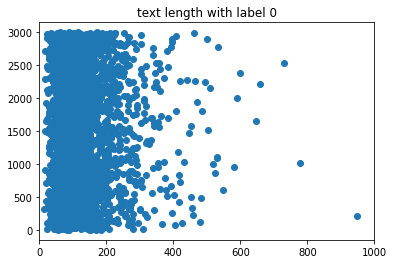

In [14]:
import matplotlib.pyplot as plt
plt.scatter(train_set["joke"][train_set["label"] == 0].apply(len), range(train_set[train_set["label"] == 0].shape[0]))
plt.xlim([0, 1000])
# plt.axvline(300, color='red')
plt.title("text length with label 0")
plt.savefig('abc.png', format='png', dpi=1200)
files.download("abc.png") 

In [ ]:
from scipy import stats
stats.percentileofscore(train_set["joke"][train_set["label"] == 0].apply(len), 300)

96.56666666666666

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

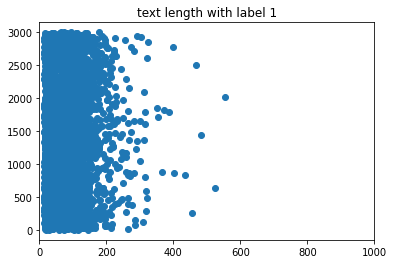

In [15]:
plt.scatter(train_set["joke"][train_set["label"] == 1].apply(len), range(train_set[train_set["label"] == 1].shape[0]))
plt.xlim([0, 1000])
# plt.axvline(300, color='red')
plt.title("text length with label 1")
plt.savefig('abc2.png', format='png', dpi=1200)
files.download("abc2.png") 

In [ ]:
stats.percentileofscore(train_set["joke"][train_set["label"] == 1].apply(len), 300)

99.15

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

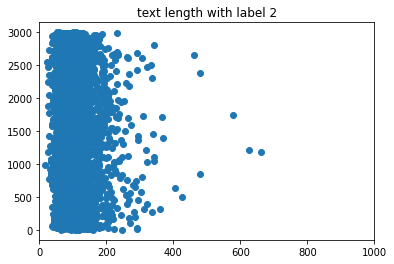

In [16]:
plt.scatter(train_set["joke"][train_set["label"] == 2].apply(len), range(train_set[train_set["label"] == 2].shape[0]))
plt.xlim([0, 1000])
# plt.axvline(300, color='red')
plt.title("text length with label 2")
plt.savefig('abc3.png', format='png', dpi=1200)
files.download("abc3.png") 

In [ ]:
stats.percentileofscore(train_set["joke"][train_set["label"] == 2].apply(len), 300)

99.1

In [ ]:
zero_num_wife = (train_set["joke"][train_set["label"] == 0]).apply(lambda s: any(x in s for x in ["老婆","妻子","丈母娘"])).sum()
one_num_wife = (train_set["joke"][train_set["label"] == 1]).apply(lambda s: any(x in s for x in ["老婆","妻子","丈母娘"])).sum()
two_num_wife = (train_set["joke"][train_set["label"] == 2]).apply(lambda s: any(x in s for x in ["老婆","妻子","丈母娘"])).sum()

print("0:", zero_num_wife, "1:", one_num_wife, "2:", two_num_wife)

zero_num_husb = (train_set["joke"][train_set["label"] == 0]).apply(lambda s: any(x in s for x in ["老公","丈夫","丈人"])).sum()
one_num_husb = (train_set["joke"][train_set["label"] == 1]).apply(lambda s: any(x in s for x in ["老公","丈夫","丈人"])).sum()
two_num_husb = (train_set["joke"][train_set["label"] == 2]).apply(lambda s: any(x in s for x in ["老公","丈夫","丈人"])).sum()

print("0:", zero_num_husb, "1:", one_num_husb, "2:", two_num_husb)

zero_num_guy = (train_set["joke"][train_set["label"] == 0]).apply(lambda s: any(x in s for x in ["阿凡提"])).sum()
one_num_guy = (train_set["joke"][train_set["label"] == 1]).apply(lambda s: any(x in s for x in ["阿凡提"])).sum()
two_num_guy = (train_set["joke"][train_set["label"] == 2]).apply(lambda s: any(x in s for x in ["阿凡提"])).sum()

print("0:", zero_num_guy, "1:", one_num_guy, "2:", two_num_guy)

zero_num_excl = (train_set["joke"][train_set["label"] == 0]).apply(lambda s: any(x in s for x in ["！"])).sum()
one_num_excl = (train_set["joke"][train_set["label"] == 1]).apply(lambda s: any(x in s for x in ["！"])).sum()
two_num_excl = (train_set["joke"][train_set["label"] == 2]).apply(lambda s: any(x in s for x in ["！"])).sum()

print("0:", zero_num_excl, "1:", one_num_excl, "2:", two_num_excl)

# (train_set["joke"][train_set["label"] == 0]).apply(lambda s: any(x in s for x in ["yo"])).sum()
# train_set[train_set["joke"].apply(lambda s: "请" in s)].shape[0]
# train_set[train_set["joke"].apply(lambda s: "请" in s)].shape[0]
# train_set[train_set["joke"].apply(lambda s: "请" in s)].shape[0]
# train_set[train_set["joke"].apply(lambda s: "请" in s)].shape[0]
# train_set[train_set["joke"].apply(lambda s: "请" in s)].shape[0]

0: 348 1: 271 2: 309
0: 242 1: 200 2: 230
0: 199 1: 43 2: 16
0: 1356 1: 1069 2: 1458


In [ ]:
(train_set["joke"][train_set["label"] == 0]).shape

(3000,)

In [ ]:
train_set["joke"].shape

(9000,)

In [19]:
train_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_train_task1.csv",encoding='utf8')
test_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_test_task1.csv",encoding='utf8')
train_set = train_set.drop(columns=['id', 'Unnamed: 0'])
test_set = test_set.drop(columns=['id', 'Unnamed: 0'])

In [20]:
len_s = train_set["joke"].apply(len)
zero_av_len = train_set["joke"][train_set["label"] == 0].apply(len).mean()
one_av_len = train_set["joke"][train_set["label"] == 1].apply(len).mean()
# two_av_len = train_set["joke"][train_set["label"] == 2].apply(len).mean()
print("0:", zero_av_len, "1:", one_av_len)

zero_max_len = train_set["joke"][train_set["label"] == 0].apply(len).max()
one_max_len = train_set["joke"][train_set["label"] == 1].apply(len).max()
# two_max_len = train_set["joke"][train_set["label"] == 2].apply(len).max()
print("0:", zero_max_len, "1:", one_max_len)

len_s = train_set["joke"].apply(len)
zero_med_len = train_set["joke"][train_set["label"] == 0].apply(len).quantile(0.5)
one_med_len = train_set["joke"][train_set["label"] == 1].apply(len).quantile(0.5)
# two_med_len = train_set["joke"][train_set["label"] == 2].apply(len).quantile(0.5)
print("0:", zero_med_len, "1:", one_med_len)

zero_high_len = train_set["joke"][train_set["label"] == 0].apply(len).quantile(0.95)
one_high_len = train_set["joke"][train_set["label"] == 1].apply(len).quantile(0.95)
# two_high_len = train_set["joke"][train_set["label"] == 2].apply(len).quantile(0.95)
print("0:", zero_high_len, "1:", one_high_len)

zero_low_len = train_set["joke"][train_set["label"] == 0].apply(len).quantile(0.1)
one_low_len = train_set["joke"][train_set["label"] == 1].apply(len).quantile(0.1)
# two_low_len = train_set["joke"][train_set["label"] == 2].apply(len).quantile(0.1)
print("0:", zero_low_len, "1:", one_low_len)

0: 23.57275 1: 40.86825
0: 231 1: 112
0: 22.0 1: 38.0
0: 37.0 1: 72.0
0: 16.0 1: 18.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

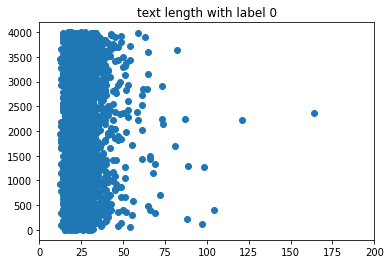

In [24]:
import matplotlib.pyplot as plt
plt.scatter(train_set["joke"][train_set["label"] == 0].apply(len), range(train_set[train_set["label"] == 0].shape[0]))
plt.xlim([0, 200])
# plt.axvline(300, color='red')
plt.title("text length with label 0")
plt.savefig('label 0 task 1 a.png', format='png', dpi=1200)
files.download("label 0 task 1 a.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

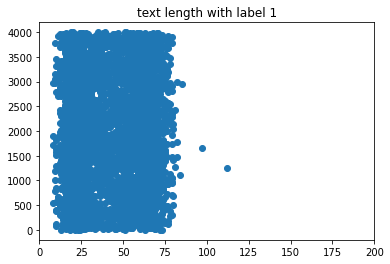

In [25]:
import matplotlib.pyplot as plt
plt.scatter(train_set["joke"][train_set["label"] == 1].apply(len), range(train_set[train_set["label"] == 1].shape[0]))
plt.xlim([0, 200])
# plt.axvline(300, color='red')
plt.title("text length with label 1")
plt.savefig('label 1 task 1.png', format='png', dpi=1200)
files.download("label 1 task 1.png") 